In [1]:
cd H:\Cyclone_Amphan\ERA5_DATA\U_V_Winds

H:\Cyclone_Amphan\ERA5_DATA\U_V_Winds


In [2]:
import xarray as xr
import rioxarray as rx
from rasterio.merge import merge
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import matplotlib.patheffects as path_effects
import sys as s
import os 
from cartopy import config
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
import xarray as xr
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.patheffects as path_effects
import cartopy.io.shapereader as shpreader
import matplotlib as mpl
import matplotlib.patheffects as pe
import matplotlib.font_manager as font_manager

## Xarrays 

In [5]:
data = xr.load_dataset('adaptor.ind_u_v_lon_lat_all_vertical_levels.nc')
data

<xarray.Dataset>
Dimensions:    (longitude: 141, latitude: 145, level: 37, time: 144)
Coordinates:
  * longitude  (longitude) float32 63.0 63.25 63.5 63.75 ... 97.5 97.75 98.0
  * latitude   (latitude) float32 40.0 39.75 39.5 39.25 ... 4.75 4.5 4.25 4.0
  * level      (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
  * time       (time) datetime64[ns] 2020-05-16 ... 2020-05-21T23:00:00
Data variables:
    u          (time, level, latitude, longitude) float32 -27.08 ... 0.8849
    v          (time, level, latitude, longitude) float32 -2.08 ... 0.5702
Attributes:
    Conventions:  CF-1.6
    history:      2024-06-27 11:40:20 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

## Hourly to daily

In [14]:
daily = data.resample(time='1D').mean()
daily

<xarray.Dataset>
Dimensions:    (longitude: 141, latitude: 145, level: 37, time: 6)
Coordinates:
  * longitude  (longitude) float32 63.0 63.25 63.5 63.75 ... 97.5 97.75 98.0
  * latitude   (latitude) float32 40.0 39.75 39.5 39.25 ... 4.75 4.5 4.25 4.0
  * level      (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
  * time       (time) datetime64[ns] 2020-05-16 2020-05-17 ... 2020-05-21
Data variables:
    u          (time, level, latitude, longitude) float32 -19.58 ... 0.2364
    v          (time, level, latitude, longitude) float32 3.6 3.656 ... 0.2134
Attributes:
    Conventions:  CF-1.6
    history:      2024-06-27 11:40:20 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [15]:
lat_avg = daily.mean(dim='latitude')
lat_avg

<xarray.Dataset>
Dimensions:    (longitude: 141, level: 37, time: 6)
Coordinates:
  * longitude  (longitude) float32 63.0 63.25 63.5 63.75 ... 97.5 97.75 98.0
  * level      (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
  * time       (time) datetime64[ns] 2020-05-16 2020-05-17 ... 2020-05-21
Data variables:
    u          (time, level, longitude) float32 -11.65 -11.7 ... 0.9323 0.9693
    v          (time, level, longitude) float32 0.8665 0.9169 ... 0.9313 0.7748

In [122]:
time = '2020-05-21'
# Resampling using the slice method
resample = lat_avg.sel(time=time)

flip_u = np.flip(resample.u,axis=0)
flip_v = np.flip(resample.v,axis=0)
flip_lev = np.flip(resample.level,axis=0)

<Figure size 640x480 with 0 Axes>

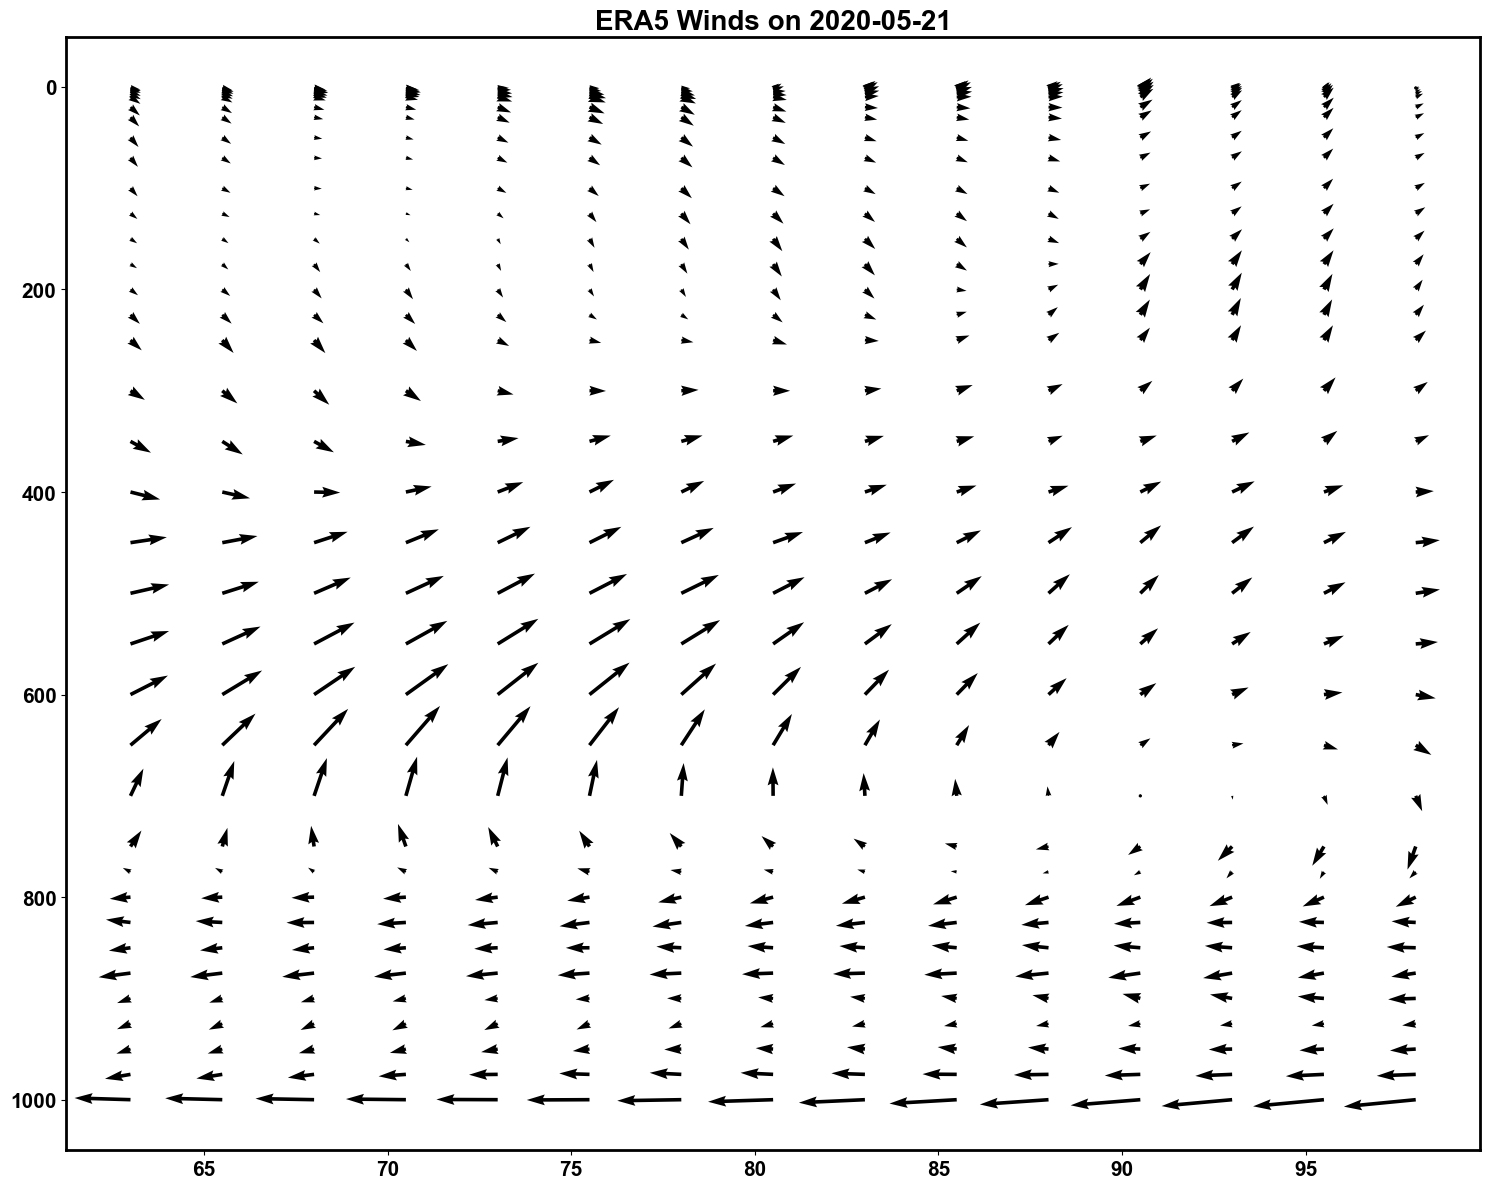

In [132]:
# plt.quiver(resample.longitude[::10],levels,
#             flip_u[:, ::10],flip_v[:, ::10],
#            scale=500)
# plt.xticks(levels)
def main():
    plt.clf()
    plt.figure(figsize=(15,12),facecolor = 'white')
    ax1= plt.axes()
    a = ax1.quiver(resample.longitude[::10],resample.level,
            flip_u[:, ::10],flip_v[:, ::10],
           scale=500)
    ax1.set_title(f'ERA5 Winds on {time}', #{str(m2.time[j])[36:55]} during June' ,
                        fontweight="bold", size=20,family= 'Arial')
    plt.quiverkey(a, 1.2, 0.515, 2, 'arrow 1', coordinates='data')
#     ax1.set_yticklabels(levels, fontsize=12)
    ax1.invert_yaxis()
    for tick in ax1.get_xticklabels():
        tick.set_rotation(0)
    for tick in ax1.yaxis.get_major_ticks():
        tick.label1.set_fontsize(20)
        tick.label1.set_fontweight('bold')
    for tick in ax1.xaxis.get_major_ticks():
        tick.label1.set_fontsize(20)
        tick.label1.set_fontweight('bold')
    ax1.tick_params(axis='x', labelsize=15)
    ax1.spines["left"].set_linewidth(2)
    ax1.spines["right"].set_linewidth(2)
    ax1.spines["top"].set_linewidth(2)
    ax1.spines["bottom"].set_linewidth(2)
    ax1.tick_params(axis='both', which='major', labelsize=15) 
    for tick in ax1.get_xticklabels():
        tick.set_fontname("Arial")
    for tick in ax1.get_yticklabels():
        tick.set_fontname("Arial")

        
if __name__ == '__main__':
    main()
plt.tight_layout()
plt.savefig(f'ERA5_Vertical_winds_on_{time}.jpg',
                bbox_inches='tight',dpi=720)